<a href="https://colab.research.google.com/github/mrutherfoord/portfolio/blob/master/Van_Gogh_Classifier_Entropy_Calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy Calculator and Painting Divider
To use a CNN to detect whether or not a painting is Van Gogh flower still life painting or not, I needed to create a larger dataset. I decided to use the information theory concept of entropy to determine the amount of information in each painting. I then divided each painting into a series of overlapping tiles (100px x 100px, 200px x 200px, and 400px x 400px). A tile was kept for the set if its entropy score was greater than or equal to the entropy score of the painting as a whole. 

In [0]:
# import modules
from skimage import io, color, feature
from skimage.util import view_as_windows
from skimage.measure import shannon_entropy as se
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# pull painting to be divided
import cv2
im1 = cv2.imread("images/dataset/not/31.jpg")
im = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

In [0]:
# calculate entropy score for whole painting
entropy_score = se(im)

In [0]:
print(entropy_score)

7.57110896442058


Wall time: 397 ms


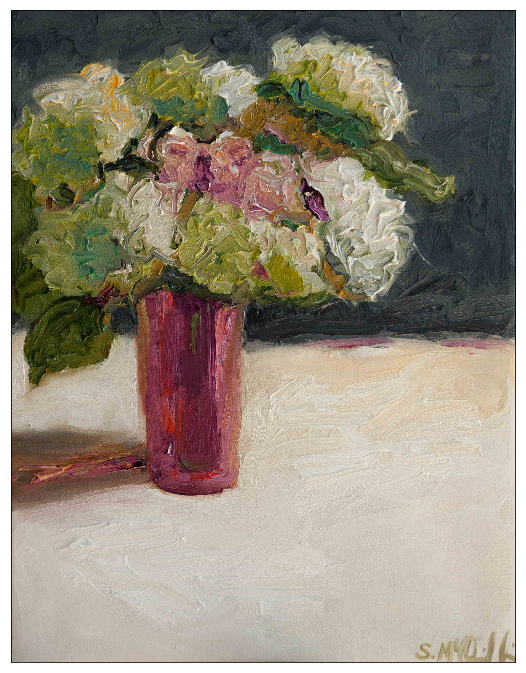

In [0]:
# plot painting
%%time
plt.figure(figsize=(12, 12));
plt.imshow(im)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);

In [0]:
def divide_image(arr, n):
  '''Divides paintings into tiles'''
    rows = arr.shape[0]
    cols = arr.shape[1]
    print('num of rows for image is {}'.format(rows))
    print('num of columns for image is {}'.format(cols))
    print('{} rows {} columns will be divided into {}x{} matrices'.format(rows,cols,n,n))
    arr_divide_row_list = list(range(0,rows,100))
    arr_divide_col_list = list(range(0,cols,100))
    print(arr_divide_row_list)
    print(arr_divide_col_list)
    for row in range(rows):
        for col in range(cols):
            if row+n <= rows and col+n <= cols:
                if row in arr_divide_row_list and col in arr_divide_col_list:
                    result = np.array(arr[row:row+n,col:col+n]).ravel().tolist()
                    num_list.append(result)
                else: continue
    print('The image has been divided into {} parts'.format(len(num_list)))

In [0]:
def entropy_list(arr_list):
  '''Finds tiles that meets entropy score requirements'''
    print('Calculating Entropy...')
    for row in num_list:
        ent = se(row)
        if ent >= entropy_score:
            ent_list.append(row)
    print('Found {} training set tiles'.format(len(ent_list)))

In [0]:
# size of image
im.shape

(4253, 3290, 3)

In [0]:
num_list=[]

In [0]:
divide_image(im,400)

num of rows for image is 4253
num of columns for image is 3290
4253 rows 3290 columns will be divided into 400x400 matrices
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200]
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200]
The image has been divided into 1131 parts


In [0]:
ent_list=[]

In [0]:
%%time
entropy_list(num_list)

Calculating Entropy...
Found 102 training set tiles
Wall time: 52.4 s


In [0]:
trainingset = np.array(ent_list)

In [0]:
trainingset2 = np.array([trainingset[i].reshape(400,400,3) for i in range(0,len(trainingset))])

Wall time: 535 ms


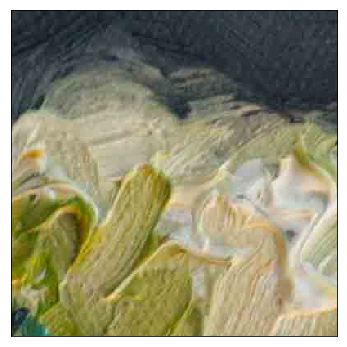

In [0]:
# plotting a tile example
%%time
plt.figure(figsize=(6, 6));
plt.imshow(trainingset2[0])
plt.grid(False);
plt.xticks([]);
plt.yticks([]);

In [0]:
# exporting dataset tiles
count=1
for pic in trainingset2:
    outfile = 'images/dataset/not/400x400/31-{}.jpg'.format(count)
    cv2.imwrite(outfile, pic)
    count += 1